# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html

## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


顔検出が面内回転に対してどれくらい頑強かを評価する。

データベースによっては既に目位置を正規化してあり、
面内回転を加えたデータで評価してはじめて、実際環境での顔検出能力を評価できる。

そこで、このスクリプトでは、データに面内回転を加えた画像を作って
検出率を評価している。


In [4]:
%matplotlib inline
import pandas as pd

In [5]:

import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()
degs=(-45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45)

In [6]:
import HaarFrontal as faceDetector
for deg in degs:
    faceDetector.processDatabase(dataset, names, deg)

# headPose dataset の検出処理後のデータ解析

In [7]:
dfs={}
for deg in degs:
    dfs[deg] = pd.read_csv("log_headPose_%d.csv" % deg)
    print deg, dfs[deg]["truePositives"].mean()

-45 0.002150537634408602
-40 0.0035842293906810036
-35 0.007885304659498209
-30 0.023297491039426525
-25 0.05412186379928315
-20 0.12437275985663082
-15 0.18960573476702508
-10 0.25017921146953404
-5 0.2953405017921147
0 0.3186379928315412
5 0.3050179211469534
10 0.26594982078853047
15 0.1985663082437276
20 0.09283154121863799
25 0.016845878136200716
30 0.0017921146953405018
35 0.0007168458781362007
40 0.00035842293906810036
45 0.0


In [8]:
rates = [dfs[deg]["truePositives"].mean() for deg in degs]
falseRates = [dfs[deg]["falsePositives"].mean() for deg in degs]
data = {"degs":degs, "rates":rates, "falseRates":falseRates}
df = pd.DataFrame(data, columns=["degs", "rates", "falseRates"])

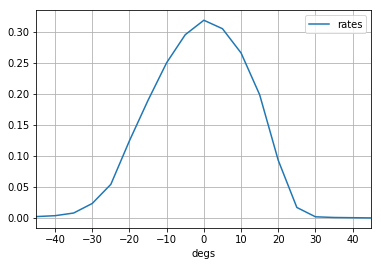

In [9]:
df.plot(x="degs", y="rates", grid=True)

上の図は、画像の面内回転によって、どれだけ検出率が変化するのかを示している。

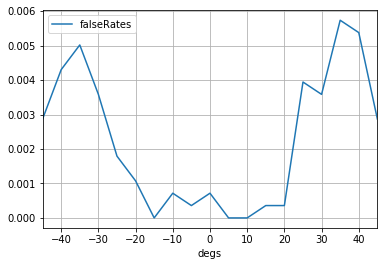

In [10]:
df.plot(x="degs", y="falseRates", grid=True)